## **Statistiques descriptives sur les bases de données matchées**

In [8]:
import pandas as pd
import numpy as np 
from helpers import s3_connection
import helpers 
import matplotlib.pyplot as plt

#### **Ouverture des données**

In [ ]:
matching5 = pd.read_csv("result5%.csv")
matching10 = pd.read_csv("result10%.csv")
matching10.columns

/tmp/ipykernel_4178/4006319845.py:1: DtypeWarning: Columns (15,58,60,62,65,67,75) have mixed types. Specify dtype option on import or set low_memory=False.
  matching5 = pd.read_csv("result5%.csv")


Index(['Date_réception_DPE', 'Date_établissement_DPE', 'Modèle_DPE',
       'Date_fin_validité_DPE', 'Version_DPE', 'Méthode_application_DPE',
       'Etiquette_DPE', 'Etiquette_GES', 'Année_construction', 'Type_bâtiment',
       'Période_construction', 'Surface_habitable_logement', 'Adresse_brute',
       'Nom__commune_(BAN)', 'Code_INSEE_(BAN)', 'N°_voie_(BAN)',
       'Identifiant__BAN', 'Adresse_(BAN)', 'Code_postal_(BAN)', 'Score_BAN',
       'Nom__rue_(BAN)', 'Coordonnée_cartographique_X_(BAN)',
       'Coordonnée_cartographique_Y_(BAN)', 'Code_postal_(brut)',
       'N°_étage_appartement', 'Nom_résidence', 'Cage_d'escalier',
       'Complément_d'adresse_logement', 'Statut_géocodage',
       'Nom__commune_(Brut)', 'N°_département_(BAN)', 'N°_région_(BAN)',
       'Complément_d'adresse_bâtiment', 'Adresse_Normalisee',
       'Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No d

### **Analyse de la base de données matching5**

In [13]:
print("Nombre de lignes par colonnes:", len(matching5))
total_nan = matching5.isna().sum().sum()
print(f"Nombre total de NaN : {total_nan}")
nan_par_colonne = matching5.isna().sum()
top_10_nan_colonnes = nan_par_colonne.sort_values(ascending=False).head(10)
print("Les 10 colonnes avec le plus de NaN :")
print(top_10_nan_colonnes)

Nombre de lignes par colonnes: 66525
Nombre total de NaN : 1662036
Les 10 colonnes avec le plus de NaN :
Reference document            66525
1 Articles CGI                66525
4 Articles CGI                66525
5 Articles CGI                66525
3 Articles CGI                66525
Identifiant local             66525
No Volume                     66525
2 Articles CGI                66525
Identifiant de document       66525
Surface Carrez du 5eme lot    66517
dtype: int64


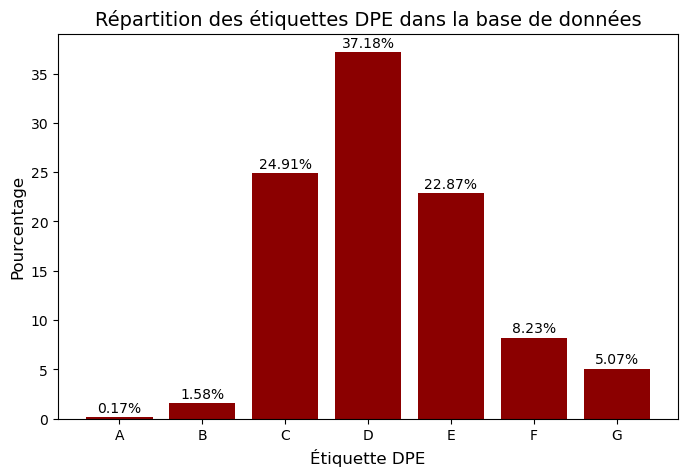

In [18]:
resultat_dpe_matching5 = matching5["Etiquette_DPE"].value_counts(normalize=True) * 100

resultat_dpe_matching5 = resultat_dpe_matching5.reindex(sorted(resultat_dpe_matching5.index))

# Histogramme des étiquettes DPE dans la base de données 
fig, ax = plt.subplots(figsize=(8, 5))

# Histogramme
ax.bar(resultat_dpe_matching5.index, resultat_dpe_matching5.values, color='darkred')

# Titres et labels
ax.set_title("Répartition des étiquettes DPE dans la base de données", fontsize=14)
ax.set_xlabel("Étiquette DPE", fontsize=12)
ax.set_ylabel("Pourcentage", fontsize=12)

# Ajout des valeurs sur les barres
for i, v in enumerate(resultat_dpe_matching5):
    ax.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

# Affichage du graphique
plt.show()

La base matchée (**66 525 observations**) reflète davantage la répartition des **logements existants** (**4 537 525 observations**) que celle des **logements neufs** (**537 952 observations**). Alors que les logements neufs sont majoritairement classés **A, B et C**, la base matchée est dominée par les classes **C (24.91%), D (37.18%) et E (22.87%)**, soit **85% des logements**, une répartition proche des logements existants.  

De plus, les logements les plus performants (**A : 0.17%, B : 1.58%**) sont presque absents, et les classes énergivores **F et G** restent minoritaires mais comparables aux logements anciens. La forte proportion initiale de logements existants dans les données a probablement influencé ce résultat, rendant la base matchée **peu représentative de l’ensemble du parc immobilier**, avec une sous-représentation marquée des logements neufs.

##### **Répartition des étiquettes DPE dans chaque département : logements existants**
Nous avons fait le choix de filtrer les données pour les codes départements allant de 01 à 101 et d'éliminer les quelques logements dont les informations étaient erronées.

In [20]:
matching5["N°_département_(BAN)"] = pd.to_numeric(matching5["N°_département_(BAN)"], errors="coerce")
match5_filtre101 = matching5[matching5["N°_département_(BAN)"] <= 101]
match5_filtre101["N°_département_(BAN)"] = match5_filtre101["N°_département_(BAN)"].astype(int).astype(str).str.zfill(2)
resultat = match5_filtre101.groupby("N°_département_(BAN)")["Etiquette_DPE"].value_counts(normalize=True).unstack() * 100
pd.options.display.float_format = "{:.2f}%".format
print(resultat)

# Trouver le département avec le plus de logements en A et G
logements_A = match5_filtre101[match5_filtre101["Etiquette_DPE"] == "A"]
logements_G = match5_filtre101[match5_filtre101["Etiquette_DPE"] == "G"]
logements_A_count = logements_A["N°_département_(BAN)"].value_counts()
logements_G_count = logements_G["N°_département_(BAN)"].value_counts()
departement_max_A = logements_A_count.idxmax()
departement_max_G = logements_G_count.idxmax()
print(f"Le département avec le plus de logements en A : {departement_max_A} ({logements_A_count.max()} logements)")
print(f"Le département avec le plus de logements en G : {departement_max_G} ({logements_G_count.max()} logements)")

Etiquette_DPE            A      B      C      D      E      F      G
N°_département_(BAN)                                                
10                   0.80%    NaN 10.76% 37.45% 31.47% 13.94%  5.58%
11                   2.44% 11.59% 38.41% 35.98%  8.54%  2.44%  0.61%
12                     NaN    NaN 16.33% 45.92% 27.55%  6.12%  4.08%
13                   4.20%  9.64% 46.97% 23.33% 12.44%  2.18%  1.24%
14                     NaN  0.90% 14.38% 37.08% 33.26%  8.09%  6.29%
...                    ...    ...    ...    ...    ...    ...    ...
91                   0.16%  1.30% 22.33% 33.78% 27.25% 10.83%  4.35%
92                   0.06%  0.82% 14.02% 28.35% 29.23% 14.41% 13.12%
93                   0.10%  1.32% 19.07% 32.25% 23.77% 11.47% 12.01%
94                   0.03%  1.71% 16.76% 32.31% 27.83% 12.31%  9.06%
95                     NaN  1.04% 20.30% 34.59% 29.73%  9.32%  5.02%

[81 rows x 7 columns]
Le département avec le plus de logements en A : 13 (27 logements)
Le département

Répartition proche de celle des logements existants, avec une majorité de C, D et E. Les départements comme le 92, 93 et 94 montrent une part importante de logements D et E, similaire aux logements anciens. À l’inverse, les classes A et B sont fortement réduites, sauf dans certains cas isolés (ex : département 13 avec 27 logements en A).